[227.63384726 234.34828165 229.64283357 230.23676685 227.85460822
 228.14646518 224.2667837  222.38147739 224.00946127 215.35681789
 216.16253265 218.62558688 231.7124509  230.87207404] 0.9740806116569981 14
                     Adj. Close  HL_PCT  PCT_CHNG  Adj. Volume  label  \
Date                                                                    
2015-12-27 08:00:00         NaN     NaN       NaN          NaN    NaN   
2015-12-28 08:00:00         NaN     NaN       NaN          NaN    NaN   
2015-12-29 08:00:00         NaN     NaN       NaN          NaN    NaN   
2015-12-30 08:00:00         NaN     NaN       NaN          NaN    NaN   
2015-12-31 08:00:00         NaN     NaN       NaN          NaN    NaN   

                       Forecast  
Date                             
2015-12-27 08:00:00  215.356818  
2015-12-28 08:00:00  216.162533  
2015-12-29 08:00:00  218.625587  
2015-12-30 08:00:00  231.712451  
2015-12-31 08:00:00  230.872074  


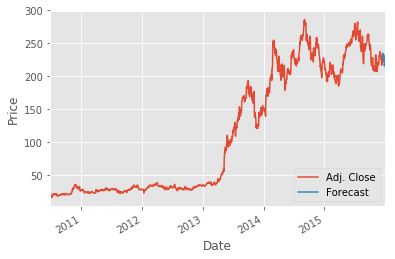

In [11]:
from sklearn import preprocessing , svm, model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
import quandl, datetime
import math
import numpy as np
from sklearn import preprocessing 
import matplotlib.pyplot as plt
from matplotlib import style 
style.use('ggplot')

df = quandl.get('WIKI/tsla')
#print(df.head(1)) 
# Dropping Of Column(Highest point before crash = 31 Dec 15)

df.drop(df.index[-556:],axis=0, inplace=True)

df = df.loc[:, ["Adj. Open", "Adj. High","Adj. Low","Adj. Close", "Adj. Volume"]]
#df.head()

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_CHNG'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
#df.head(3)

df = df[['Adj. Close', 'HL_PCT', 'PCT_CHNG', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace = True)

forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)


x = np.array(df.drop(['label'],1))
x= preprocessing.scale(x)
x=x[:-forecast_out]
x_lately = x[-forecast_out:]

df.dropna(inplace = True)
x = preprocessing.scale(x)
y = np.array(df['label'])
y = np.array(df['label'])


x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2)

##clf = svm.SVR
clf = LinearRegression()
clf.fit(x_train, y_train)
accuracy = clf.score(x_test,y_test)
#print(accuracy)
forecast_set = clf.predict(x_lately)

print(forecast_set, accuracy, forecast_out)

import matplotlib.pyplot as plt
from matplotlib import style 
style.use('ggplot')
import datetime

df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day 
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

print(df.tail())    
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()